https://tcoil.info/compute-macd-indicator-for-stocks-with-python/

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important;}</style>"))
#__library_import_statements__
import pandas as pd

#for pandas_datareader, otherwise it might have issues 
pd.core.common.is_list_like = pd.api.types.is_list_like

#make pandas print to dataframes 
pd.set_option('expand_frame_repr', False)

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime 
import time

#using newest yahoo api
import yfinance as yahoo_finance

#yahoo_finance.pdr_override()

%matplotlib inline

In [3]:
# ___variables___
ticker = 'AAPL'
#ticker = 'TSLA'
#ticker = 'FB'
#ticker = 'MSFT'
#ticker = 'NFLX'
#ticker = 'GOOGL'
#ticker = 'BIDU'
#ticker = 'AMZN'


start_time = datetime.datetime(2018, 1, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()         # today

In [4]:
import yfinance as yf
data = yf.download(ticker, start="2021-03-01", end="2021-06-30")
print (data)
data.reset_index()
df = data

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close     Volume
Date                                                                             
2021-03-01  123.750000  127.930000  122.790001  127.790001  127.573311  116307900
2021-03-02  128.410004  128.720001  125.010002  125.120003  124.907837  102260900
2021-03-03  124.809998  125.709999  121.839996  122.059998  121.853020  112966300
2021-03-04  121.750000  123.599998  118.620003  120.129997  119.926292  178155000
2021-03-05  120.980003  121.940002  117.570000  121.419998  121.214104  153766600
...                ...         ...         ...         ...         ...        ...
2021-06-23  133.770004  134.320007  133.229996  133.699997  133.699997   60214200
2021-06-24  134.449997  134.639999  132.929993  133.410004  133.410004   68711000
2021-06-25  133.460007  133.889999  132.809998  133.110001  133.110001   70783700
2021-06-28  133.410004  135.2

In [5]:
#function
def computeMACD(df, n_fast, n_slow, n_smooth):
    data = df['Adj Close']
    fastEMA = data.ewm(span=n_fast, min_periods=n_slow).mean()
    slowEMA = data.ewm(span=n_slow, min_periods=n_slow).mean()
    MACD = pd.Series(fastEMA-slowEMA, name = 'MACD')
    #show MACD
    MACDsig = pd.Series(MACD.ewm(span=n_smooth, min_periods=n_smooth).mean(), name='MACDsig')
    #show MACDsig
    MACDhist = pd.Series(MACD - MACDsig, name = 'MACDhist')
    #show MACDhist
    df = df.join(MACD)
    df = df.join(MACDsig)
    df = df.join(MACDhist)
    
    return df  

In [6]:
#call function
df = computeMACD(df, 12, 26, 9)
# input values are ????


In [7]:
df=df.reset_index()
print(df.head())
print(df.tail())

        Date        Open        High         Low       Close   Adj Close     Volume  MACD  MACDsig  MACDhist
0 2021-03-01  123.750000  127.930000  122.790001  127.790001  127.573311  116307900   NaN      NaN       NaN
1 2021-03-02  128.410004  128.720001  125.010002  125.120003  124.907837  102260900   NaN      NaN       NaN
2 2021-03-03  124.809998  125.709999  121.839996  122.059998  121.853020  112966300   NaN      NaN       NaN
3 2021-03-04  121.750000  123.599998  118.620003  120.129997  119.926292  178155000   NaN      NaN       NaN
4 2021-03-05  120.980003  121.940002  117.570000  121.419998  121.214104  153766600   NaN      NaN       NaN
         Date        Open        High         Low       Close   Adj Close    Volume      MACD   MACDsig  MACDhist
80 2021-06-23  133.770004  134.320007  133.229996  133.699997  133.699997  60214200  1.549944  0.723665  0.826278
81 2021-06-24  134.449997  134.639999  132.929993  133.410004  133.410004  68711000  1.663553  0.911643  0.751910
82 2

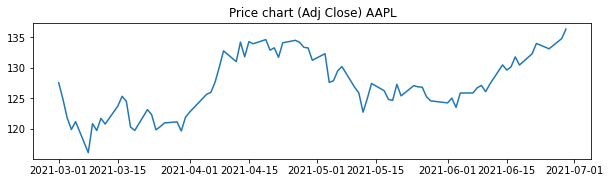

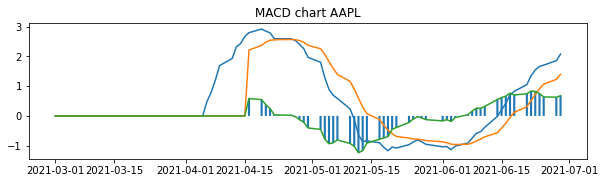

In [8]:
#using matplotlib - plot price 
# plot price
plt.figure(figsize=(10,2.5))
plt.plot(df['Date'], df['Adj Close'])
plt.title('Price chart (Adj Close) ' + str(ticker))
plt.show()

# plot correspondingRSI values and significant levels
plt.figure(figsize=(10,2.5))
plt.title('MACD chart ' + str(ticker))
plt.plot(df['Date'], df['MACD'].fillna(0))
plt.plot(df['Date'], df['MACDsig'].fillna(0))
plt.plot(df['Date'], df['MACDhist'].fillna(0))
plt.bar(df['Date'], df['MACDhist'].fillna(0), width=0.5, snap=False)

plt.show()

In [9]:
#exploration of the stock record in yfinance
import yfinance as yf
import json
import pprint

stock = yf.Ticker("AMZN")

data1= stock.info


pprint.pprint(data1)

{'52WeekChange': 0.17027986,
 'SandP52WeekChange': 0.38375115,
 'address1': '410 Terry Avenue North',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 3681.9,
 'askSize': 1000,
 'averageDailyVolume10Day': 2390340,
 'averageVolume': 3459774,
 'averageVolume10days': 2390340,
 'beta': 1.151795,
 'beta3Year': None,
 'bid': 3678,
 'bidSize': 1000,
 'bookValue': 205,
 'category': None,
 'circulatingSupply': None,
 'city': 'Seattle',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 3675.74,
 'currentRatio': 1.052,
 'dateShortInterest': 1623715200,
 'dayHigh': 3685.06,
 'dayLow': 3529,
 'debtToEquity': 98.257,
 'dividendRate': None,
 'dividendYield': None,
 'earningsGrowth': 2.152,
 'earningsQuarterlyGrowth': 2.198,
 'ebitda': 57172000768,
 'ebitdaMargins': 0.13641,
 'enterpriseToEbitda': 32.918,
 'enterpriseToRevenue': 4.49,
 'enterpriseValue': 1882011992064,
 'exDividendDate': None,
 'exchange': 'NMS',
 '

In [10]:
#signalling algorithm modified from
#https://www.youtube.com/watch?v=kz_NJERCgm8&t=493s&ab_channel=ComputerScience

def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        if df['MACD'][i] > df['MACDsig'][i]:         # first occurence of MACD crossing above signal oine
            sell_list.append(np.nan)                 # so first flip above means buy
            if flag != 1:                            # after first occurence I record flip to ignore
                buy_list.append(df['Close'][i])      # from here onwards
                flag = 1
            else:
                buy_list.append(np.nan)
        elif df['MACD'][i] < df['MACDsig'][i]:
            buy_list.append(np.nan)
            if flag != 0:
                sell_list.append(df['Close'][i])
                flag = 0
            else:
                sell_list.append(np.nan)
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = generate_signals(df)
df['buy_sig'] = signal[0]
df['sell_sig'] = signal[1]

In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,MACDsig,MACDhist,buy_sig,sell_sig
0,2021-03-01,123.750000,127.930000,122.790001,127.790001,127.573311,116307900,NaN,NaN,NaN,NaN,NaN
1,2021-03-02,128.410004,128.720001,125.010002,125.120003,124.907837,102260900,NaN,NaN,NaN,NaN,NaN
2,2021-03-03,124.809998,125.709999,121.839996,122.059998,121.853020,112966300,NaN,NaN,NaN,NaN,NaN
3,2021-03-04,121.750000,123.599998,118.620003,120.129997,119.926292,178155000,NaN,NaN,NaN,NaN,NaN
4,2021-03-05,120.980003,121.940002,117.570000,121.419998,121.214104,153766600,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
80,2021-06-23,133.770004,134.320007,133.229996,133.699997,133.699997,60214200,1.549944,0.723665,0.826278,NaN,NaN
81,2021-06-24,134.449997,134.639999,132.929993,133.410004,133.410004,68711000,1.663553,0.911643,0.751910,NaN,NaN
82,2021-06-25,133.460007,133.889999,132.809998,133.110001,133.110001,70783700,1.709704,1.071256,0.638448,NaN,NaN
83,2021-06-28,133.410004,135.250000,133.350006,134.779999,134.779999,62111300,1.859400,1.228885,0.630515,NaN,NaN


In [12]:
def plot_signals(df, ticker):
    # plot price
    plt.figure(figsize=(15,5))
    plt.plot(df['Date'], df['Adj Close'])
    plt.title('Price chart (Adj Close) ' + str(ticker))
    plt.show()

    # plot  values and significant levels
    plt.figure(figsize=(15,5))
    plt.title('Bollinger Bands chart ' + str(ticker))
    plt.plot(df['Date'], df['High'], label='High', alpha=0.2)
    plt.plot(df['Date'], df['Low'], label='Low', alpha=0.2)
    plt.plot(df['Date'], df['Adj Close'], label='Adj Close', color='blue', alpha=0.3)

    plt.scatter(df['Date'], df['buy_sig'], label='Buy', marker='^')
    plt.scatter(df['Date'], df['sell_sig'], label='Sell', marker='v')

    plt.legend()

    plt.show()
       
    plt.figure(figsize=(15,5))
    plt.title('MACD chart ' + str(ticker))
    plt.plot(df['Date'], df['MACD'].fillna(0))
    plt.plot(df['Date'], df['MACDsig'].fillna(0))
    plt.plot(df['Date'], df['MACDhist'].fillna(0))
    plt.bar(df['Date'], df['MACDhist'].fillna(0), width=0.5, snap=False)
    
    return None

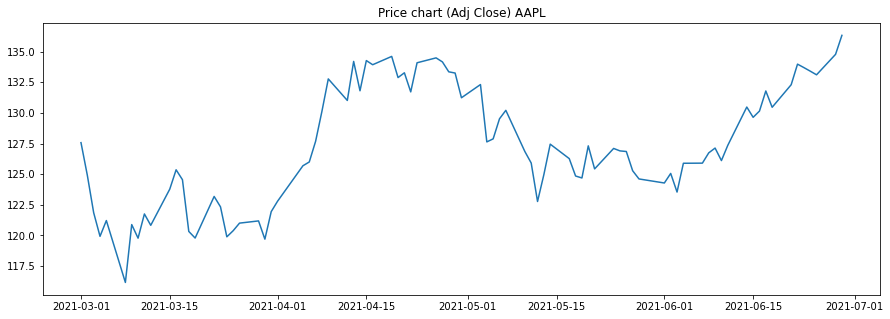

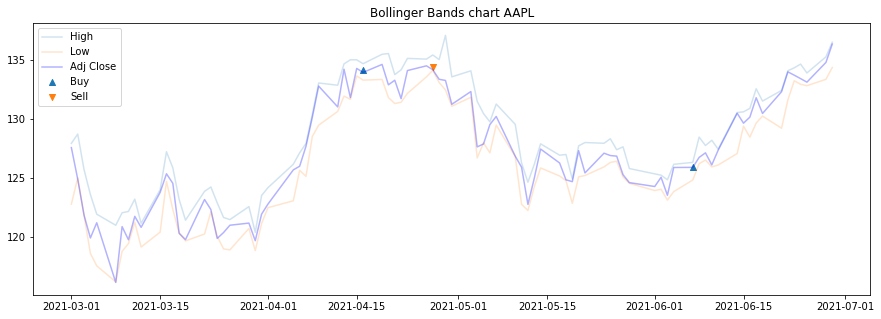

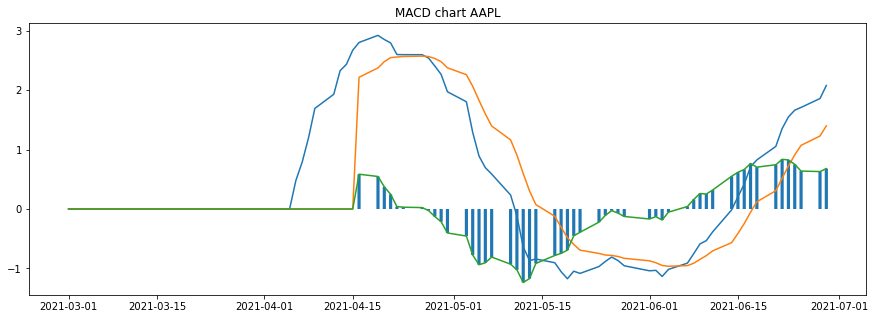

In [13]:


plot_signals(df, ticker)



In [14]:
def get_EMA(df, n=7):
    # computes 200 EMA
    ema = df['Adj Close'].ewm(span=n, adjust=False).mean()
    ema_200 = df['Adj Close'].ewm(span=200, adjust=False).mean()
    
    df['EMA'] = ema
    df['EMA_200'] = ema_200
    
    return df

In [15]:
df = get_EMA(df, 7)

In [16]:
#modified strategy according to tradingrush
#https://www.youtube.com/watch?v=nmffSjdZbWQ&ab_channel=TRADINGRUSH
#Not sure if using EMA is that beneficial, if so, use like 5-7 days only for short term trend

def generate_signals(df):
    buy_list = []
    sell_list = []
    flag = -1
    
    for i in range(0,len(df)):
        # BUY
        if (df['MACD'][i] > df['MACDsig'][i]):      # first occurence of MACD crossing above signal oine
            sell_list.append(np.nan)                # so first flip above means buy
            if (flag != 1) :                        # after first occurence i record flip to ignore
                                                    # from here onwards
                flag = 1
                
                # looking for higher magnitudes 
                if (   (df['High'][i] > df['EMA'][i])               and   \
                    #(df['MACD'][i] < (-2) )                        and   \
                    (df['MACD'][i] < 0)   ):
                    buy_list.append(df['Close'][i])
                #elif (df['MACD'][i] < (-3) ):   #override
                #    buy_list.append(df['Close'][i])
                
                else:
                    buy_list.append(np.nan) 
                
            else:
                buy_list.append(np.nan)
        
        # SELL
        elif (df['MACD'][i] < df['MACDsig'][i]):
            
            buy_list.append(np.nan)
            if (flag != 0) :
                flag = 0
                
                # looking for higher magnitudes
                if ( (df['Low'][i] < df['EMA'][i])                and    \
                    #(df['MACD'][i] > 2)                          and    \
                    (df['MACD'][i] > 0)   ) :
                    sell_list.append(df['Close'][i])
                #elif (df['MACD'][i] > 3 ):   #override
                #    sell_list.append(df['Close'][i])    
                else:
                    sell_list.append(np.nan)    
                
            else:
                sell_list.append(np.nan)
        
        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
    return (buy_list, sell_list)            


# create buy and sell column
signal = generate_signals(df)
df['buy_sig'] = signal[0]
df['sell_sig'] = signal[1]

In [17]:
def plot_signals_aligned(df, ticker):
    
    import matplotlib.gridspec as gridspec
    
    gs =  gridspec.GridSpec(3,1)
    fig = plt.figure(figsize=(15,15))   
       
       
    # __first plot__
    ax1 = fig.add_subplot(gs[0])

    ax1.plot(df['Date'], df['Adj Close'], label='Adj Close')
    ax1.set_title('Price chart (Adj Close) ' + str(ticker))
    ax1.legend()

    
    # __second plot__
    # plot  values and significant levels
    ax2 = fig.add_subplot(gs[1], sharex=ax1)
    ax2.set_title('Bollinger Bands chart ' + str(ticker))
    ax2.plot(df['Date'], df['High'], label='High', alpha=0.2)
    ax2.plot(df['Date'], df['Low'], label='Low', alpha=0.2)
    ax2.plot(df['Date'], df['Adj Close'], label='Adj Close', color='blue', alpha=0.3)

    ax2.plot(df['Date'], df['EMA'], label='EMA', color='grey', alpha=0.3)
    ax2.plot(df['Date'], df['EMA_200'], label='EMA_200', color='grey', alpha=0.3)
    
    ax2.scatter(df['Date'], df['buy_sig'], label='Buy', marker='^', s=80)
    ax2.scatter(df['Date'], df['sell_sig'], label='Sell', marker='v', s=80)

    ax2.legend()
    
    # __third plot__
    ax3 = fig.add_subplot(gs[2], sharex=ax2)

    ax3.set_title('MACD chart ' + str(ticker))
    ax3.plot(df['Date'], df['MACD'].fillna(0), label='MACD')
    ax3.plot(df['Date'], df['MACDsig'].fillna(0), label='MACDsig')
    ax3.plot(df['Date'], df['MACDhist'].fillna(0), label='MACDhist')
    ax3.bar(df['Date'], df['MACDhist'].fillna(0), width=0.5, snap=False, label='MACDhist')
    ax3.legend()
    
    plt.show()
    
    return None

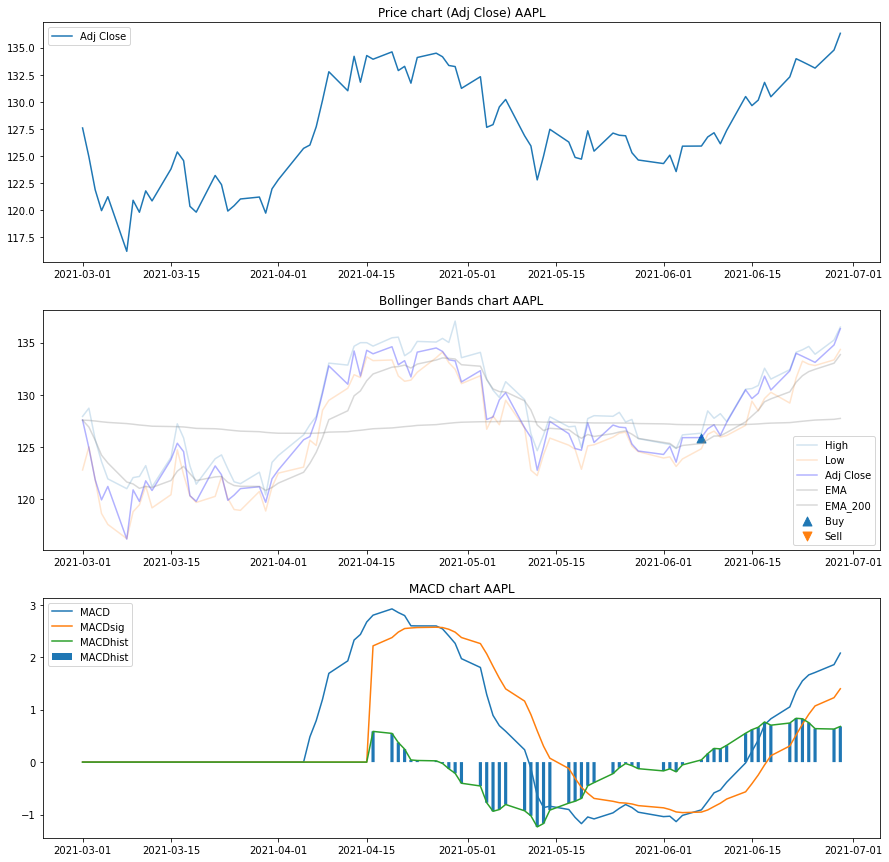

In [18]:
plot_signals_aligned(df, ticker)